# 04 Predict rating

In [6]:
import fasttext
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
model = fasttext.load_model('./data/fasttext_trained_model.bin')

In [8]:
def createGraph(filename):
    df = pd.read_csv('./data/' + filename + '.csv')

    labelToTest = np.sort(model.labels)

    totalactual = []

    for i in labelToTest:
        totalactual.append(df[df['rating'].isin([i+" "])]) 


    predictedList = []
    for review in range(len(df)):
        predictedReview = model.predict(df['review'][review])
        predictedList.append(str(predictedReview[0]).split("'")[1])


    amountPredicted = []
    for label in labelToTest:
            label = label.replace(" ","")
            amountPredicted.append(list(filter(lambda k: label in k, predictedList)))


    actualList= []     
    fasttextList = []
    for i in range(len(labelToTest)):
        actualList.append(len(totalactual[i]))
        fasttextList.append(len(amountPredicted[i]))
     
    ## Oprettelse af graph ##
    labels = []
    for i in np.sort(labelToTest):
        labels.append(i.replace('__label__',''))

    
    
    fig, ax = plt.subplots()
    index = np.arange(5)
    bar_width = 0.45
    actual = ax.bar(index, actualList, bar_width,
                    label="Actual")

    fasttext = ax.bar(index+bar_width, fasttextList,
                       bar_width, label="FastText")

    ax.set_xlabel('Rating')
    ax.set_ylabel('Amount')
    ax.set_title('FastText vs actual dataset')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

    print('Actual ratings:', actualList)
    print('FastText ratings:', fasttextList)

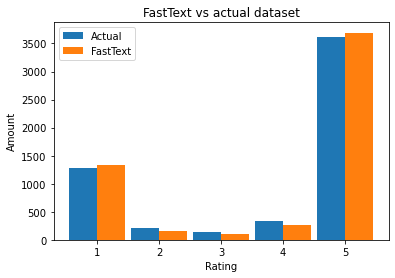

Actual ratings: [1276, 207, 136, 331, 3608]
FastText ratings: [1326, 165, 109, 266, 3692]


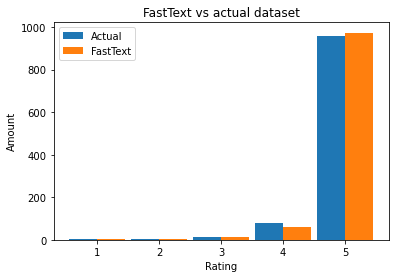

Actual ratings: [4, 6, 15, 77, 958]
FastText ratings: [6, 5, 15, 61, 973]


In [9]:
createGraph('combined_csv')
createGraph('tapeconnection')

In [15]:
def randomReview(filename):
    df = pd.read_csv('./data/' + filename + '.csv')
    randomNumber = random.randint(0,len(df))
    actualReview = df['review'][randomNumber]
    actualRating = df['rating'][randomNumber]
    predictedReview = model.predict(actualReview,k=-1)
    print('Review nr:',randomNumber+2)
    #print('Det faktiske review, som det står på trustpilot: '+'\n'+actualReview)
    zip_iterator = zip(predictedReview[0], predictedReview[1])
    mod_dict = dict(zip_iterator)

    print('Reviewet har den faktiske rating: '+actualRating)
    print('Fasttext har estimeret følgende ratings, sorteret efter den rating, som fasttext mener er mest sandsynlig')
    for k, v in mod_dict.items():
        print(str(k)+' ' + str(v*10))

        
randomReview('combined_csv')

Review nr: 2874
Reviewet har den faktiske rating: __label__1 
Fasttext har estimeret følgende ratings, sorteret efter den rating, som fasttext mener er mest sandsynlig
__label__1 9.976133108139038
__label__2 0.03283064812421799
__label__3 0.02261847723275423
__label__4 0.005457804654724896
__label__5 0.005293049616739154
